# Active Learning Using Support Vector Machines

## Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

## Data Preparation

### Split traning and test set

In [4]:
columns_name=["variance of Wavelet Transformed image", 
              "skewness of Wavelet Transformed image", 
              "curtosis of Wavelet Transformed image", 
              "entropy of image", 
              "class"]
df=pd.read_csv('data_banknote_authentication.txt',names=columns_name)

## Build model

### passive learning

In [7]:
passive_df = pd.DataFrame(columns=range(1,91),index=range(1,51))
mean_error_ls=[]
for i in range(1,51):
    #randomly select data 50 times
    train_df, test_df = train_test_split(df, test_size = 472)
    x_test=test_df.iloc[:,0:4]
    y_test=test_df[['class']]
    
    
    train_pool=pd.DataFrame()
    best_params_ls=[]
    error_ls=[]                   
    for j in range(1,91):
        train_sample=train_df.sample(n=10)
        sample_class=train_sample['class'].value_counts()
        
        #aviod the sample data from one class
        if len(sample_class)!=2:
            continue
        else:  
            #do NOT replace the samples back into the training set at each step
            train_df=train_df.drop(index=train_sample.index)
            train_pool=train_pool.append(train_sample)
            x_train=train_pool.iloc[:,0:4]
            y_train=train_pool[['class']]

            parameters={'C':np.logspace(-3,6,10)}
            clf = GridSearchCV(LinearSVC(penalty='l1', dual=False), param_grid=parameters, cv=5)
            model=clf.fit(x_train, y_train)
            best_params=model.best_params_
            best_params_ls.append(best_params)
            y_predict=model.predict(x_test)
            error=1-accuracy_score(y_test, y_predict)
            error_ls.append(error)
            
            #put each error into (50X90) dataframe
            passive_df.at[i,j]=error

    
    print(i,'times:')
    print('best paramters:',best_params_ls)
    print('test error:',error_ls)
    
    mean_error=np.mean(error_ls)
    mean_error_ls.append(mean_error)

1 times:
best paramters: [{'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 10.0}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0

4 times:
best paramters: [{'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1000.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C':

7 times:
best paramters: [{'C': 1.0}, {'C': 1000.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {

10 times:
best paramters: [{'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.

13 times:
best paramters: [{'C': 1000.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}

16 times:
best paramters: [{'C': 100.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 100.0}, {'C': 100.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 

19 times:
best paramters: [{'C': 100.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1

22 times:
best paramters: [{'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1000.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100

25 times:
best paramters: [{'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1

28 times:
best paramters: [{'C': 0.1}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1000.0}, {'C': 0.1}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1000.0}, {'C': 1000.0}, {'C': 1000.0}, {'C': 100.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'

31 times:
best paramters: [{'C': 0.1}, {'C': 0.1}, {'C': 100.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1

34 times:
best paramters: [{'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0

37 times:
best paramters: [{'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.01}, {'C': 0.1}, {'C': 0.1}, {'C': 100.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, 

40 times:
best paramters: [{'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C'

43 times:
best paramters: [{'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 0.1}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10000.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, 

46 times:
best paramters: [{'C': 0.1}, {'C': 1.0}, {'C': 1000.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0

49 times:
best paramters: [{'C': 1.0}, {'C': 0.1}, {'C': 1000.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C'

### active learning

In [13]:
active_mean_error_ls=[]
active_df = pd.DataFrame(columns=range(1,91),index=range(1,51))

#randomly select 10 initial data
for i in range(1,51):        
    active_train_df, active_test_df = train_test_split(df, test_size = 472)
    x_test=active_test_df.iloc[:,0:4]
    y_test=active_test_df[['class']]

    active_train_sample=active_train_df.sample(n=10)
    active_sample_class=active_train_sample['class'].value_counts()
    
    #aviod the sample data from one class
    if len(active_sample_class)!=2:
        continue
    else:
        #do NOT replace the samples back into the training set at each step
        active_train_pool=pd.DataFrame()
        active_train_df=active_train_df.drop(index=active_train_sample.index)
        active_train_pool=active_train_pool.append(active_train_sample)
        active_x_train=active_train_pool.iloc[:,0:4]
        active_y_train=active_train_pool[['class']]

        parameters={'C':np.logspace(-3,6,10)}
        active_clf = GridSearchCV(LinearSVC(penalty='l1', dual=False), param_grid=parameters, cv=5)
        active_model=active_clf.fit(active_x_train, active_y_train)
        active_best_params=active_model.best_params_
        active_best_params_ls=[]
        active_best_params_ls.append(active_best_params)
        
        active_y_predict=active_model.predict(x_test)
        active_error=1-accuracy_score(y_test, active_y_predict)
        active_error_ls=[]
        active_error_ls.append(active_error)
        
        #put each error into (50X90) dataframe
        active_df.at[i,1]

        
        # choose the 10 closest data points 
        for j in range(2,91):
            distance=active_model.decision_function(active_train_df.iloc[:,0:4])
            active_train_df['distance']=np.abs(distance)
            closest_data = active_train_df.sort_values(by=['distance'],ascending = True).iloc[:10]
            active_train_df=active_train_df.drop(index=closest_data.index)
            active_train_pool=active_train_pool.append(closest_data)
            new_active_x_train=active_train_pool[["variance of Wavelet Transformed image", "skewness of Wavelet Transformed image", "curtosis of Wavelet Transformed image", "entropy of image"]]
            new_active_y_train=active_train_pool[['class']]


            parameters={'C':np.logspace(-3,6,10)}
            new_active_clf = GridSearchCV(LinearSVC(penalty='l1', dual=False), param_grid=parameters, cv=5)
            new_active_model=new_active_clf.fit(new_active_x_train,new_active_y_train)
            new_active_best_params=new_active_model.best_params_
            active_best_params_ls.append(new_active_best_params)

            new_active_y_predict=new_active_model.predict(x_test)
            new_active_error=1-accuracy_score(y_test, new_active_y_predict)
            active_error_ls.append(new_active_error)
            
            active_df.at[i,j]=new_active_error
        
        print(i,'times:')
        print('active best paramters:',active_best_params_ls)
        print('active test error:',active_error_ls)  
        
        active_mean_error=np.mean(active_error_ls)
        active_mean_error_ls.append(active_mean_error)
          

1 times:
active best paramters: [{'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1000000.0}, {'C': 10000.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 1.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.1}, {'

4 times:
active best paramters: [{'C': 100000.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 100.0}, {'C': 100.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C':

7 times:
active best paramters: [{'C': 0.1}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 100.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'C': 100.0}, {'C': 1000.0}, {'C': 100.0}, {'C': 0.01}, {'C': 0.01}, {'C': 1000000.0}, {'C': 0.01}, {'C': 0.01}, {

10 times:
active best paramters: [{'C': 1.0}, {'C': 100.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C

13 times:
active best paramters: [{'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 10000.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 100.0}, {'C': 100.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 

16 times:
active best paramters: [{'C': 0.1}, {'C': 1000.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10000.0}, {'C': 100.0}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 1.0}, {'C': 100000.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'C': 100.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.0

19 times:
active best paramters: [{'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1000.0}, {'C': 0.1}, {'C': 0.1}, {'C': 100.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1000.0}, {'C': 10.0}, {'

22 times:
active best paramters: [{'C': 0.1}, {'C': 100000.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.01}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.0

25 times:
active best paramters: [{'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1000.0}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 100000.0}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 100000.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.01}, {'C': 0.01}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01

28 times:
active best paramters: [{'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 1000.0}, {'C': 1000.0}, {'C': 1000000.0}, {'C': 1000.0}, {'C': 1.0}, {'C': 0.1}, {'C': 10.0}, {'C': 100.0}, {'C': 10.0}, {'C': 100.0}, {'C': 1000.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1000.0}, {'C': 0.1}, {'C': 0.1}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 0.01}, {'C': 0.01}, {'C': 0.1}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.01}, {'C': 0.1}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0

31 times:
active best paramters: [{'C': 1000.0}, {'C': 1.0}, {'C': 1000.0}, {'C': 10.0}, {'C': 0.1}, {'C': 1000.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 1000.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1000.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, 

34 times:
active best paramters: [{'C': 10000.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'

37 times:
active best paramters: [{'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C

40 times:
active best paramters: [{'C': 1000.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1000.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10000.0}, {'C': 1000.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C'

43 times:
active best paramters: [{'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100000.0}, {'C': 100.0}, {'C': 10.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 100.0}, {'C': 100.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.01}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}

46 times:
active best paramters: [{'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 10.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.1}, {'C': 0.01}, {'C': 0.1}, {'C': 0.1}, {'C': 0.01}, {'C': 0.01}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C

49 times:
active best paramters: [{'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 100.0}, {'C': 10.0}, {'C': 10.0}, {'C': 10000.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 100.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 1000.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.1}, {'C': 1.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1}, {'C': 0.1},

### average 50 times test errors

In [14]:
# passive average the 50 test errors for each of the incrementally trained 90 SVMs
passive_mean_error=passive_df.mean().to_frame()
passive_mean_error.columns=['mean']
passive_mean_error.transpose()

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
mean,0.120169,0.06339,0.047627,0.034576,0.030763,0.024429,0.022959,0.021186,0.020975,0.020932,...,0.011525,0.011568,0.011144,0.011398,0.011186,0.011112,0.011059,0.011271,0.011186,0.011314


In [23]:
# active average the 50 test errors for each of the incrementally trained 90 SVMs
active_mean_error=active_df.mean().to_frame()
active_mean_error.columns=['mean']
active_mean_error.transpose()

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
mean,NaN,0.051695,0.053941,0.055593,0.056398,0.055212,0.069915,0.067542,0.060593,0.06072,...,0.013686,0.013814,0.013602,0.013686,0.013559,0.013432,0.01339,0.012924,0.012754,0.013347


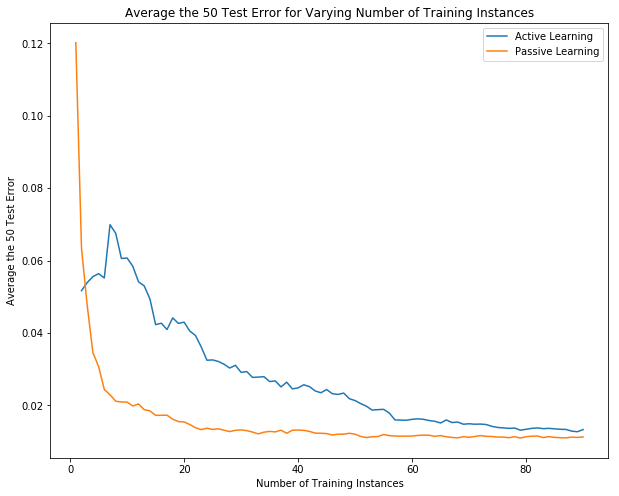

In [24]:
#plot average test error VS number of training instance for active and passive learning
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(active_mean_error, label='Active Learning')
plt.plot(passive_mean_error, label='Passive Learning')
plt.xlabel('Number of Training Instances')
plt.ylabel('Average the 50 Test Error')
plt.title('Average the 50 Test Error for Varying Number of Training Instances')
plt.legend(loc='upper right')
plt.show()

<font color=black size=4 face=雅黑>Answer: With the increase of the number of training instance, the test errors of passive and active learning decreases suddenly ,and then slowly decreases</font>